In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as plo

import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cufflinks'

In [13]:
File = pd.read_excel(r'C:\Users\sandeep\Desktop\kajal\Customer_retention_dataset.xlsx' )

In [14]:
File.keys()

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [15]:
File.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [18]:
File.isnull()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
File.isna().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [20]:
File.shape

(269, 71)

In [21]:
File.values

array([['Male', '31-40 years', 'Delhi', ..., 'Amazon.in', 'Amazon.in',
        'Flipkart.com'],
       ['Female', '21-30 years', 'Delhi', ..., 'Myntra.com',
        'Amazon.in, Flipkart.com', 'Amazon.in, Myntra.com'],
       ['Female', '21-30 years', 'Greater Noida', ..., 'Paytm.com',
        'Amazon.in', 'Amazon.in, Paytm.com, Myntra.com'],
       ...,
       ['Female', '41-50 yaers', 'Bangalore ', ..., 'Snapdeal.com',
        'Amazon.in', 'Amazon.in'],
       ['Female', 'Less than 20 years', 'Solan', ...,
        'Myntra.com, Snapdeal.com', 'Myntra.com, Snapdeal.com',
        'Amazon.in'],
       ['Female', '41-50 yaers', 'Ghaziabad', ..., 'Amazon.in',
        'Amazon.in', 'Amazon.in']], dtype=object)

In [22]:
File['Quickness to complete purchase'].unique()

array(['Paytm.com', 'Amazon.com, Flipkart.com, Myntra.com',
       'Amazon.com, Paytm.com, Myntra.com',
       'Amazon.com, Flipkart.com, Paytm.com',
       'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal',
       'Amazon.com', 'Flipkart.com, Myntra.com, Snapdeal',
       'Amazon.com, Flipkart.com', 'Flipkart.com'], dtype=object)

In [24]:
File.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
264     True
265     True
266     True
267     True
268     True
Length: 269, dtype: bool

In [25]:
file=File.duplicated()
File[file]

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
72,Male,21-30 years,Delhi,110044,2-3 years,41 times and above,Mobile internet,Laptop,Others,Window/windows Mobile,...,Paytm.com,"Flipkart.com, Snapdeal.com",Myntra.com,Myntra.com,Snapdeal.com,Myntra.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com"
94,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
95,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
97,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in
99,Female,41-50 yaers,Noida,201308,Above 4 years,Less than 10 times,Wi-Fi,Laptop,Others,Window/windows Mobile,...,Paytm.com,"Flipkart.com, Snapdeal.com",Myntra.com,Myntra.com,Snapdeal.com,Myntra.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [26]:
categorical_col,numeric_col=[],[]
for i in File:
    if File[i].dtype=='O':
        categorical_col.append(i)
    elif (File[i].dtypes=='int64') | (File[i].dtypes=='float64') | (File[i].dtypes=='int32'):
        numeric_col.append(i)
    else: continue
print('>>> Total Number of Feature::', File.shape[1])
print('>>> Number of categorical features::', len(categorical_col))
print('>>> Number of Numerical Feature::', len(numeric_col))

>>> Total Number of Feature:: 71
>>> Number of categorical features:: 70
>>> Number of Numerical Feature:: 1


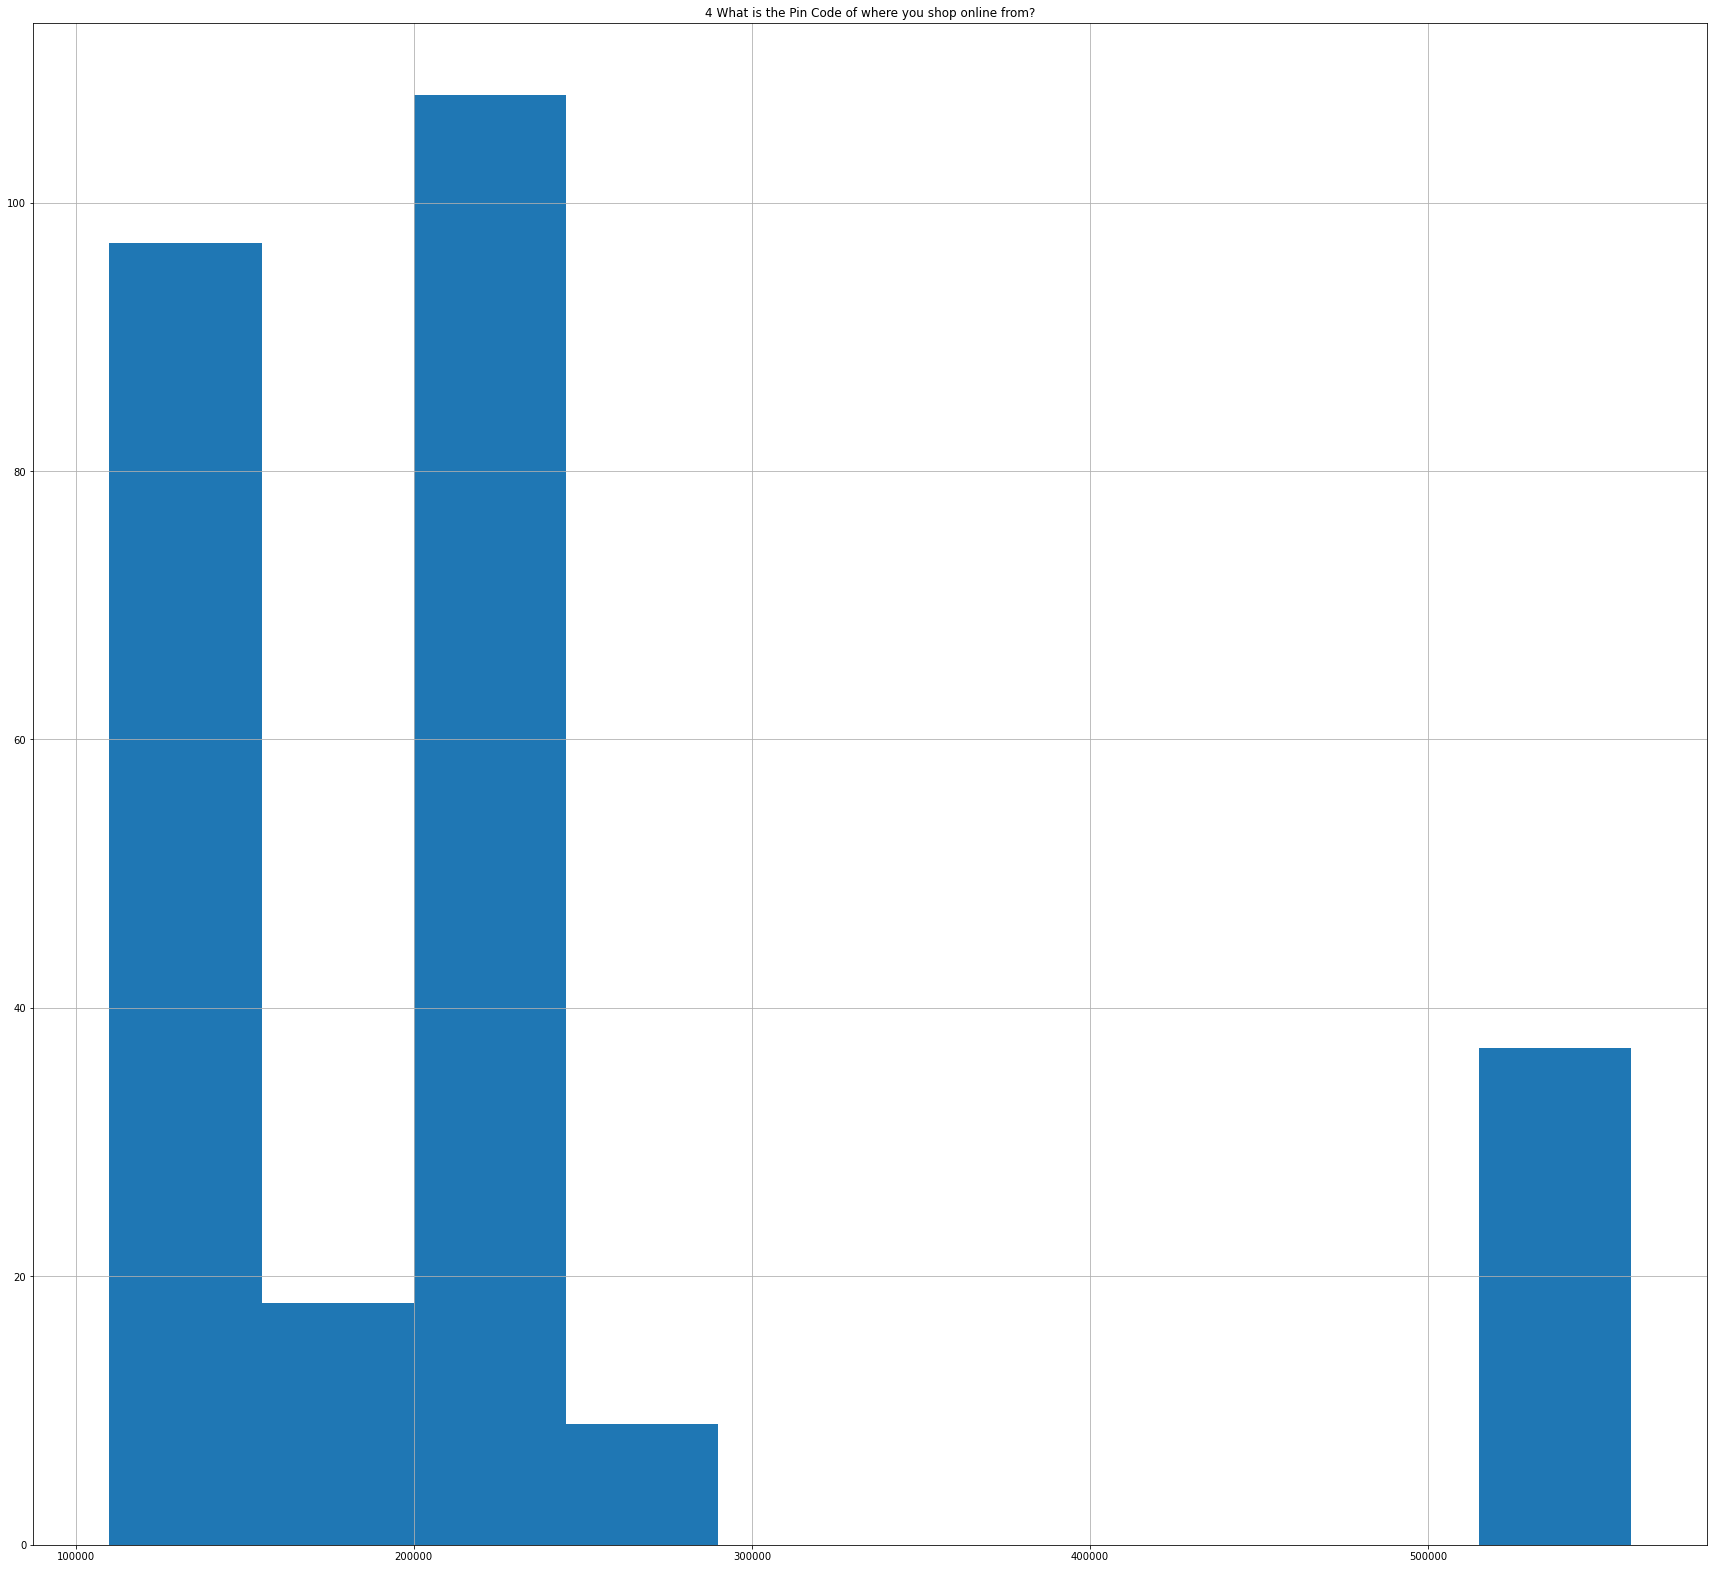

In [28]:
File.hist(figsize=(30,28));

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

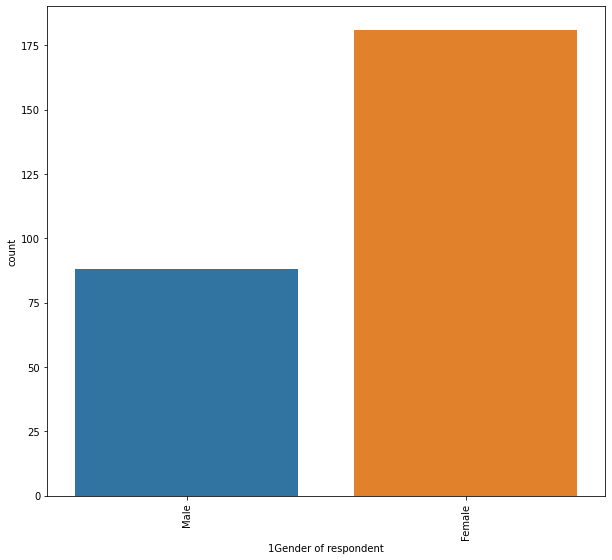

In [29]:
plt.figure(figsize=(10,9))
sns.countplot(File['1Gender of respondent'])
plt.xticks(rotation=90)

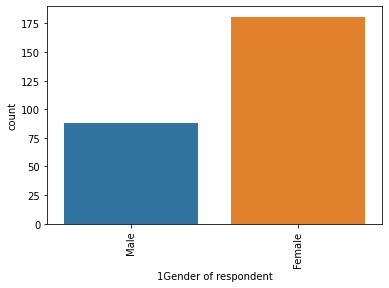

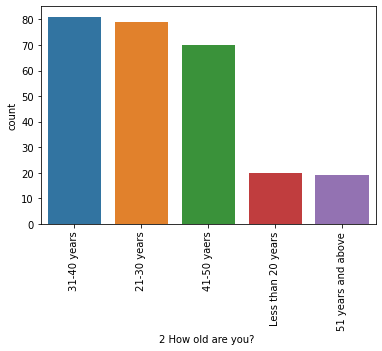

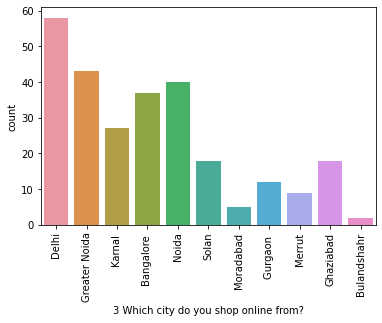

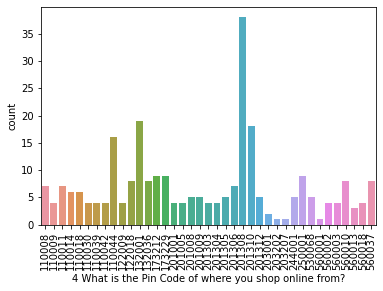

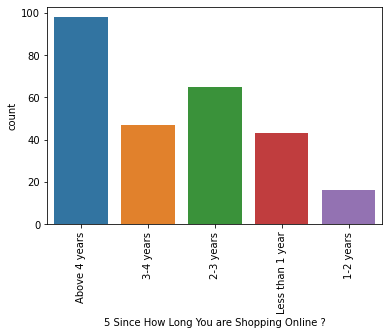

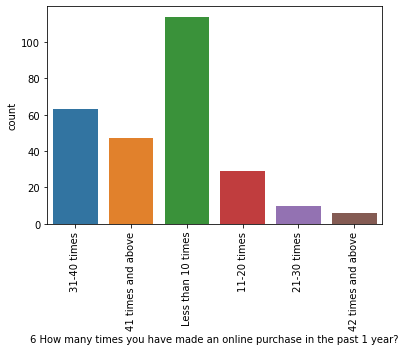

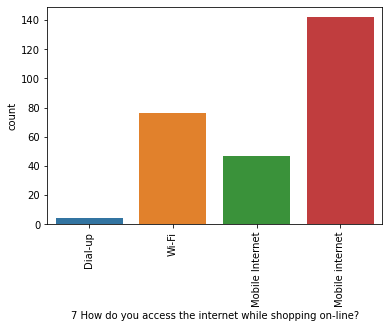

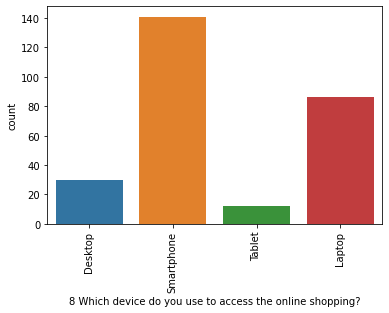

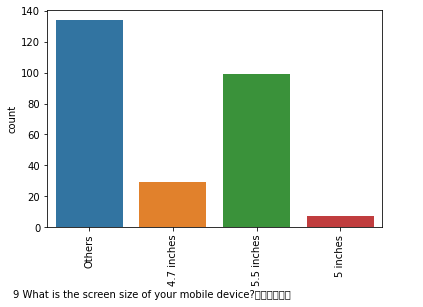

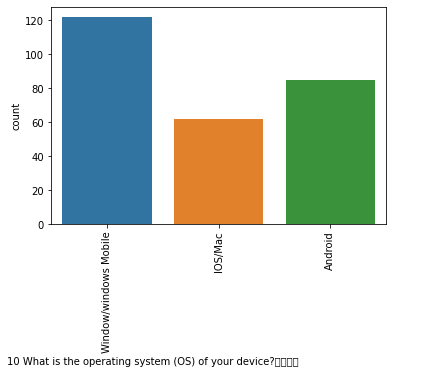

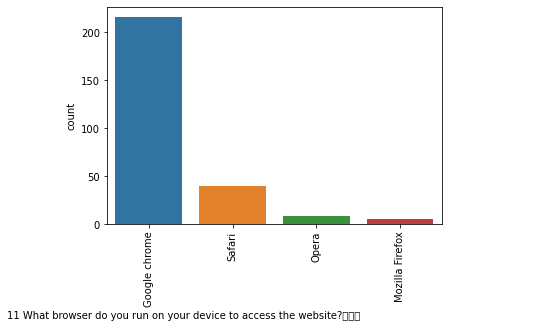

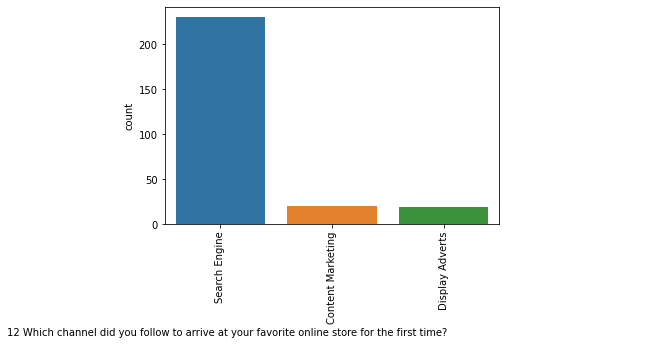

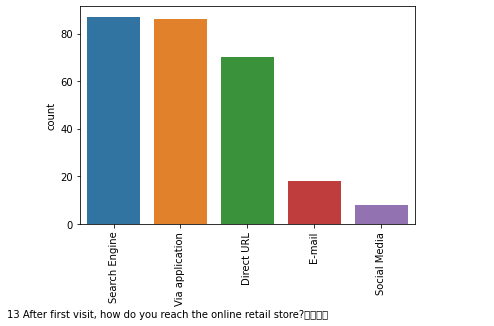

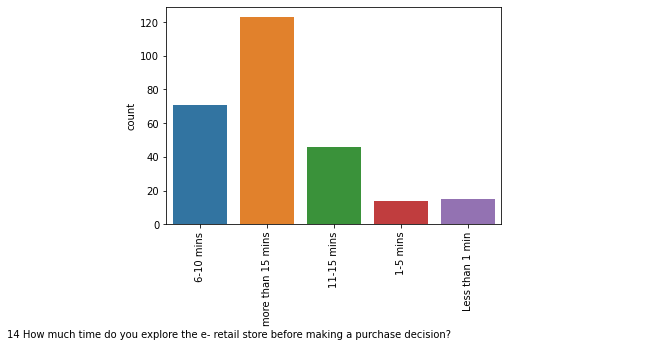

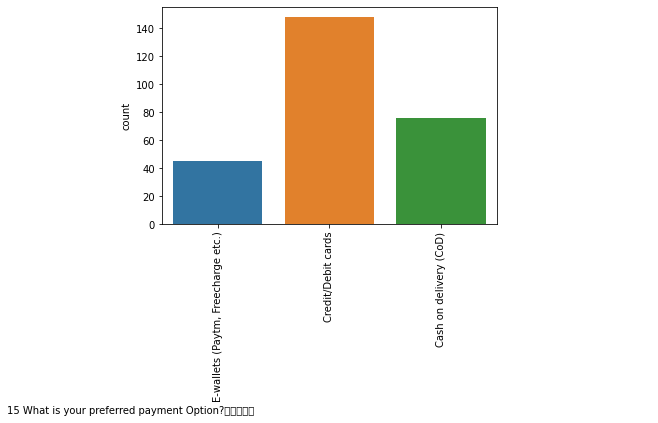

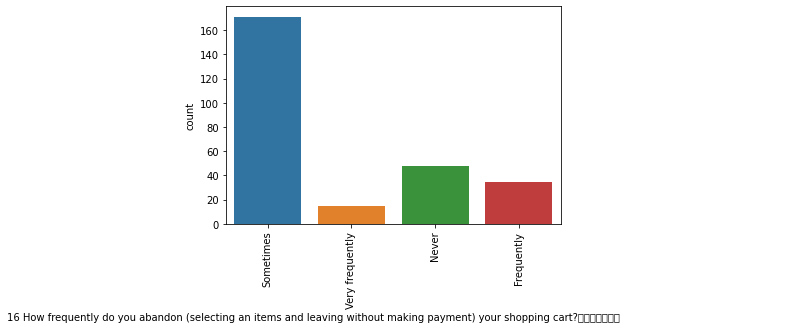

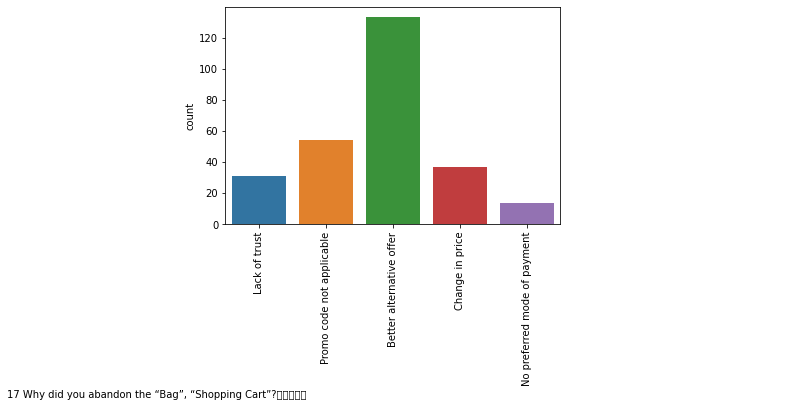

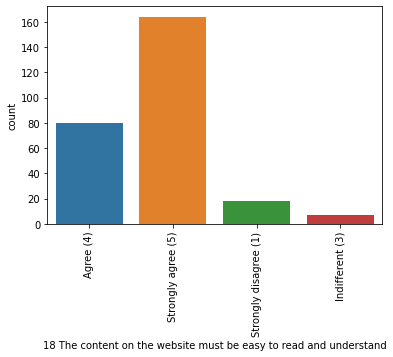

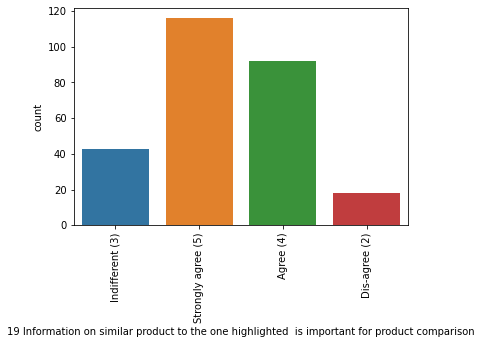

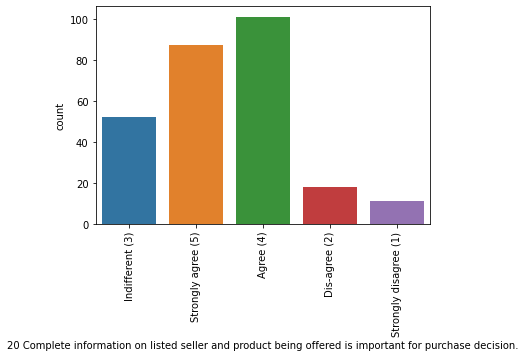

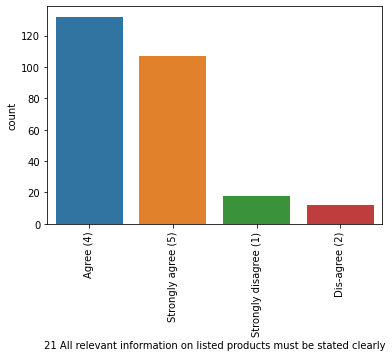

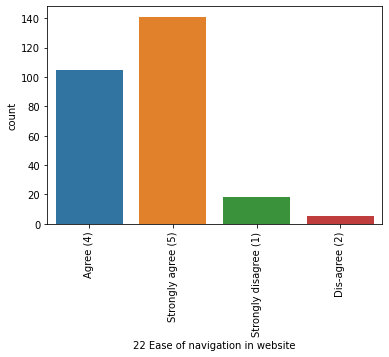

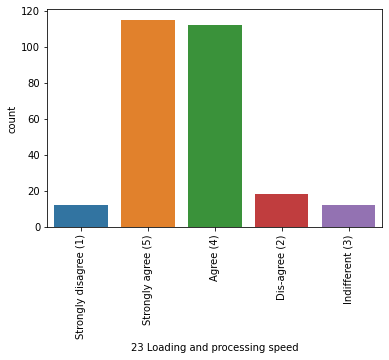

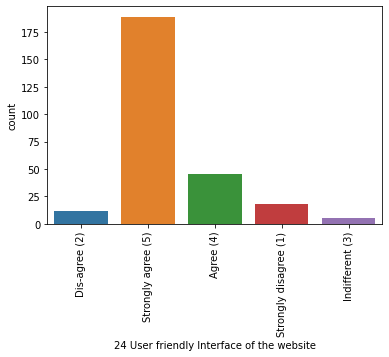

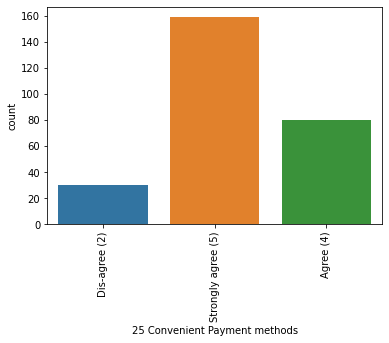

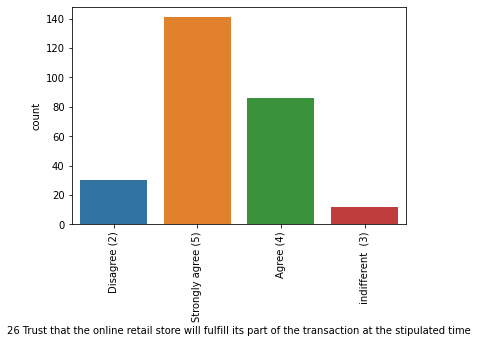

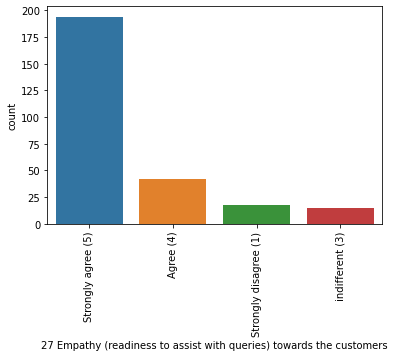

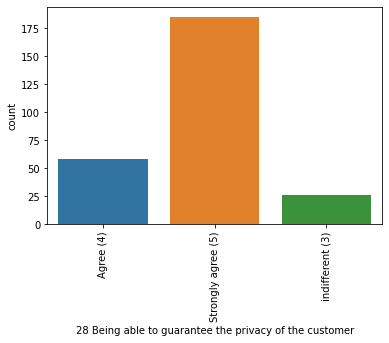

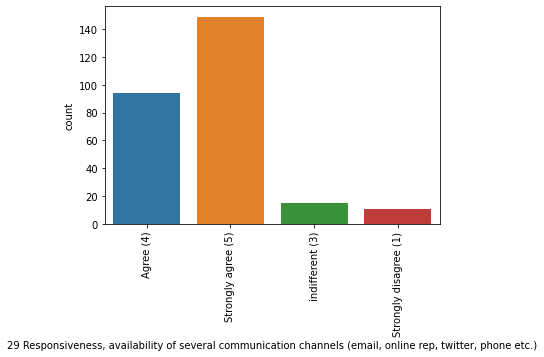

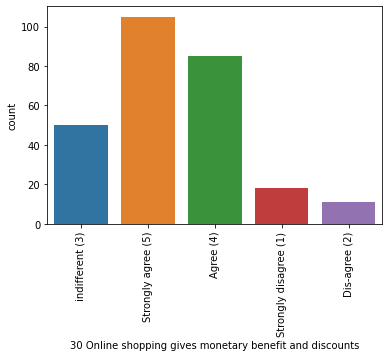

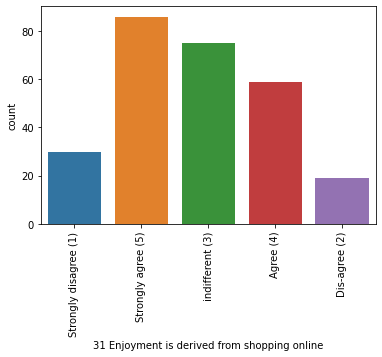

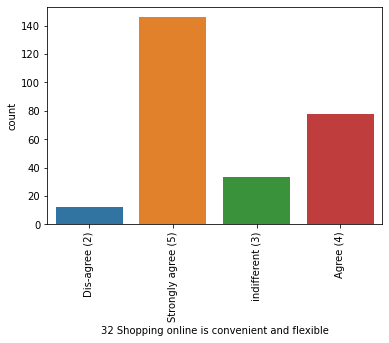

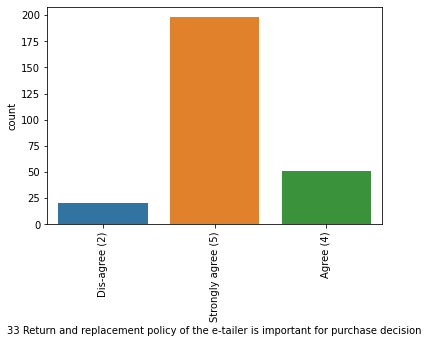

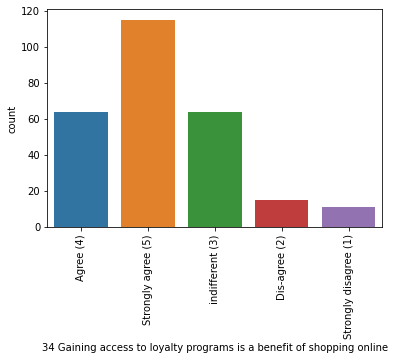

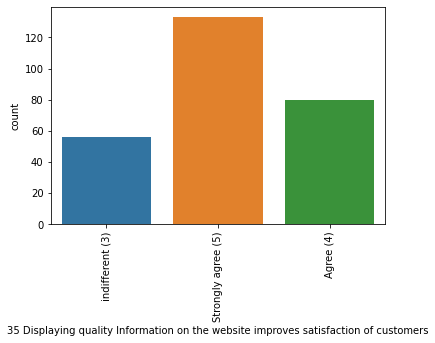

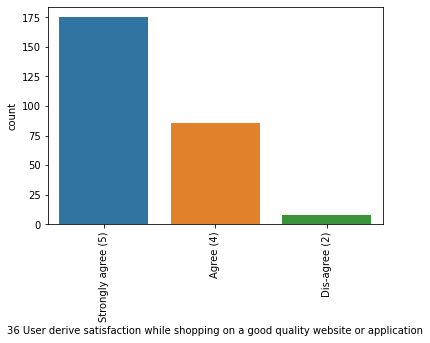

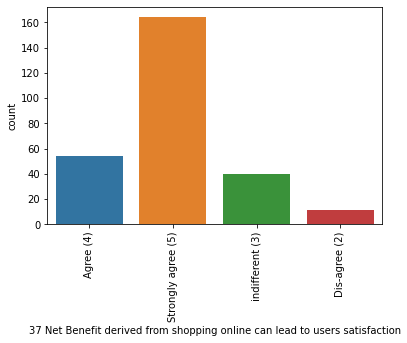

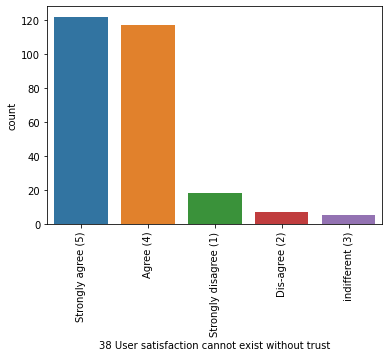

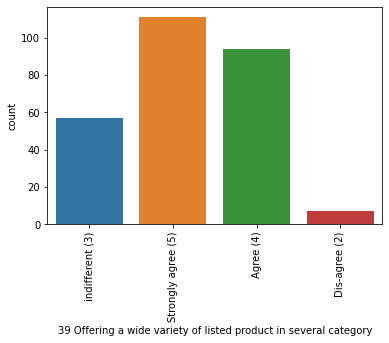

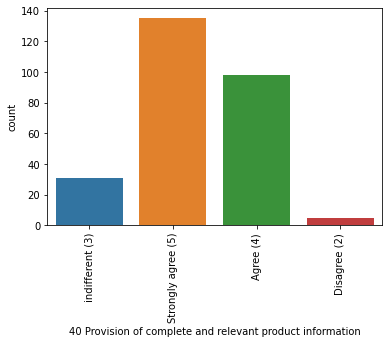

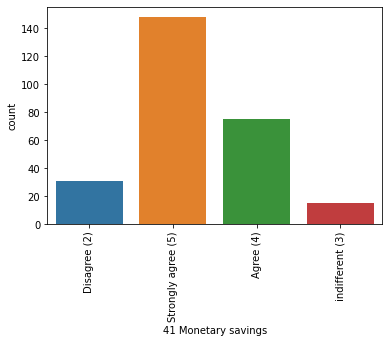

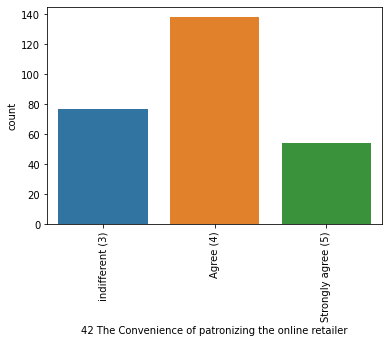

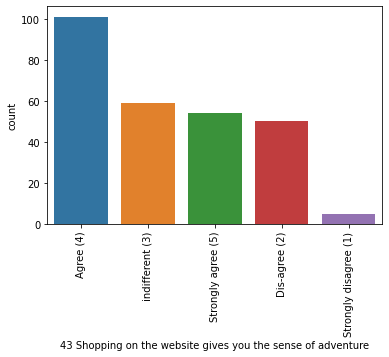

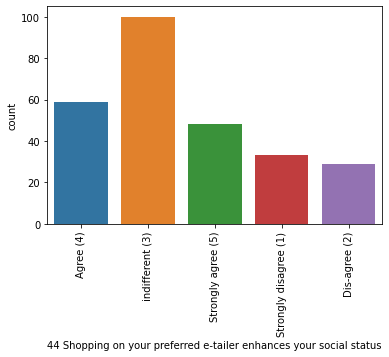

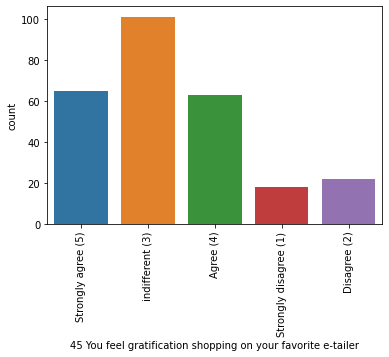

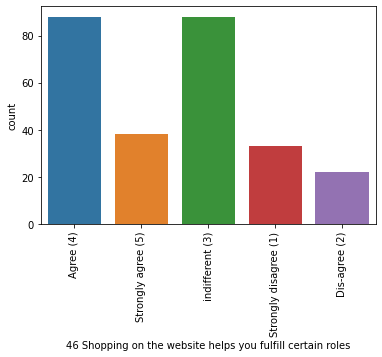

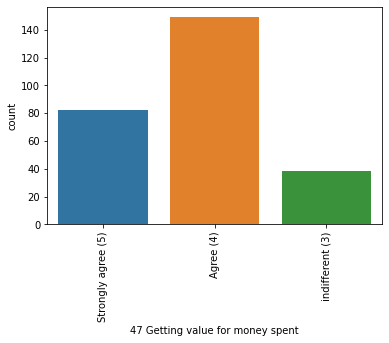

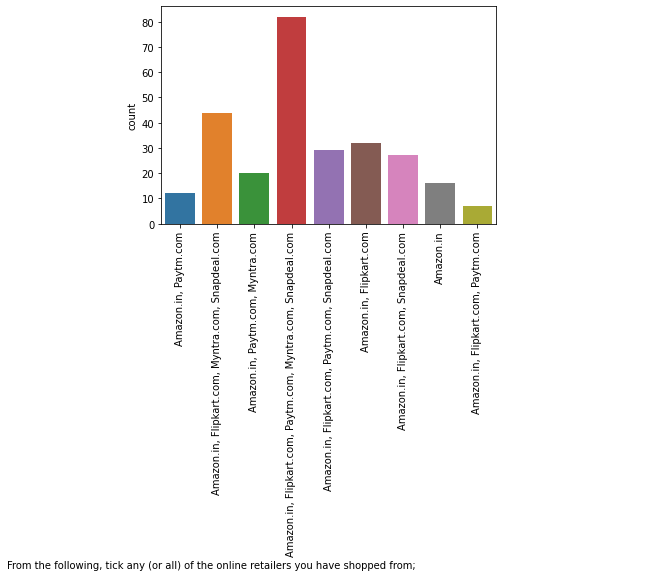

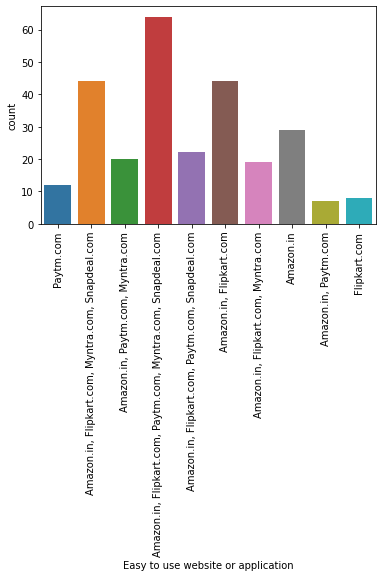

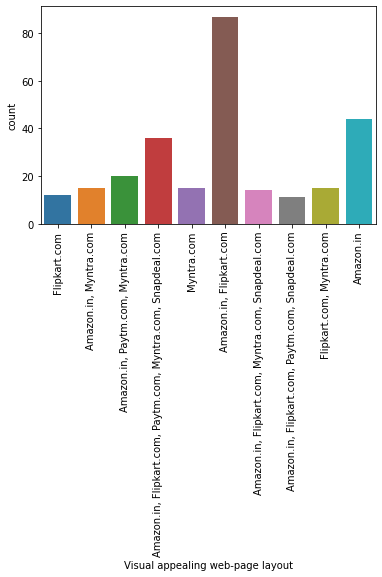

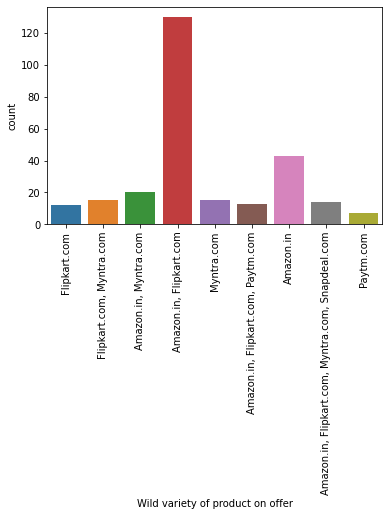

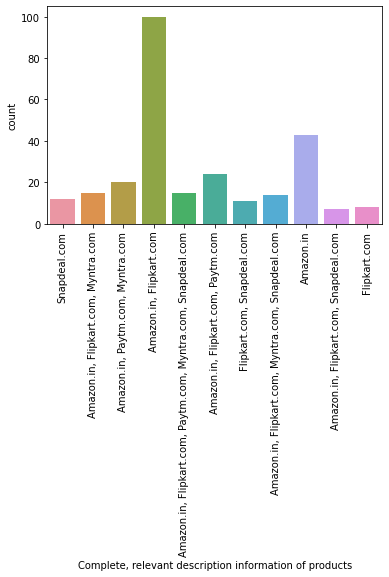

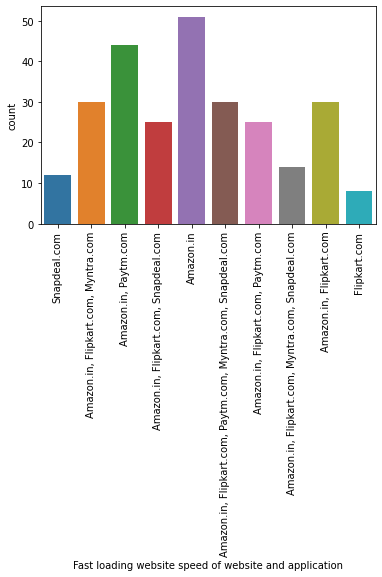

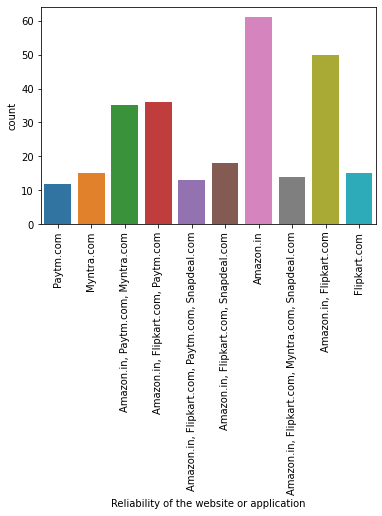

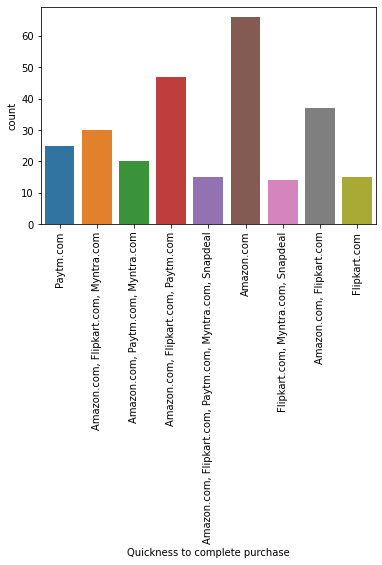

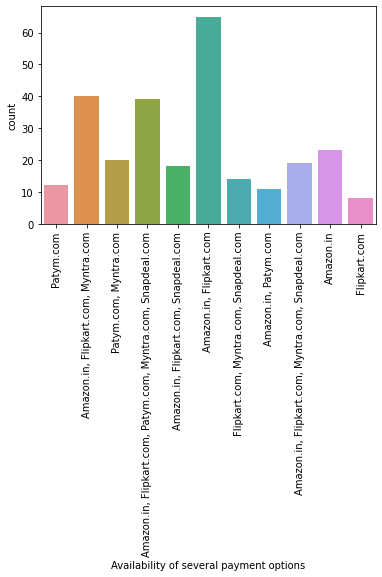

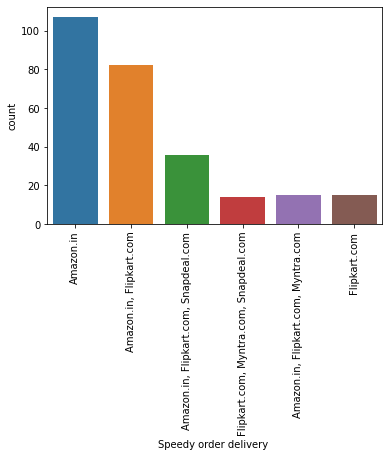

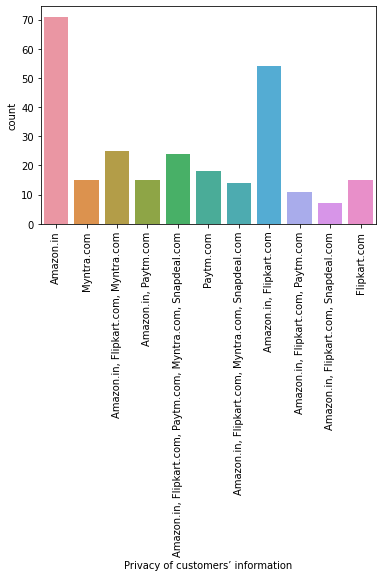

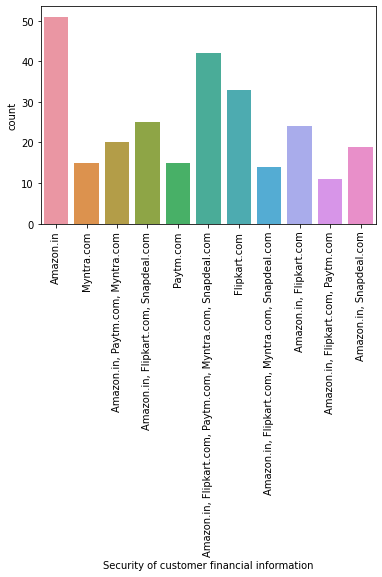

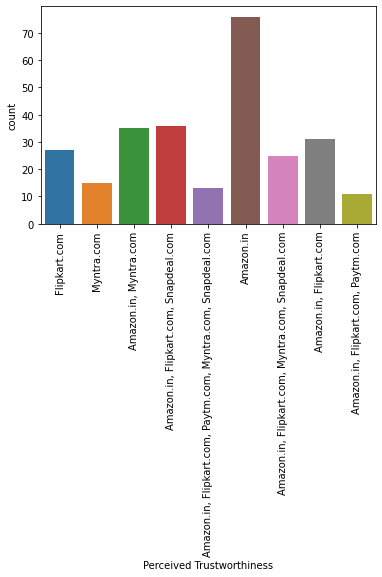

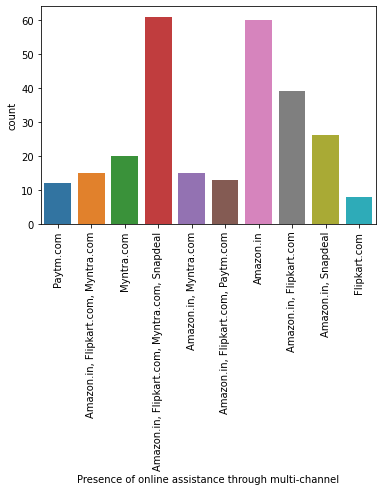

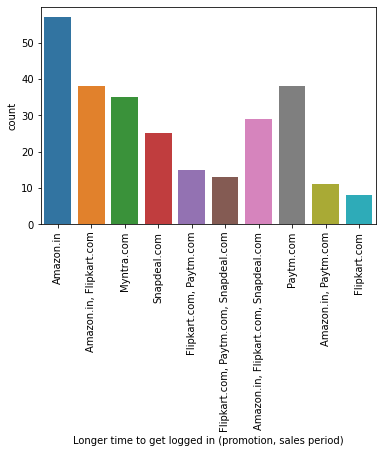

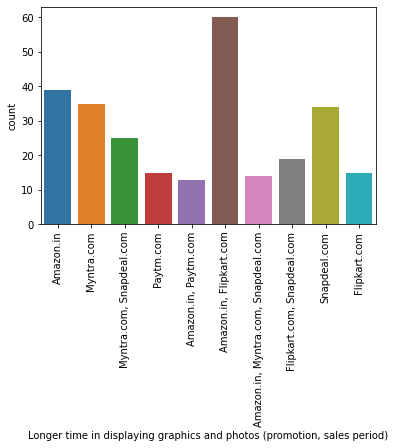

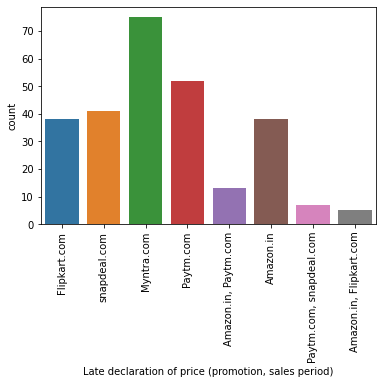

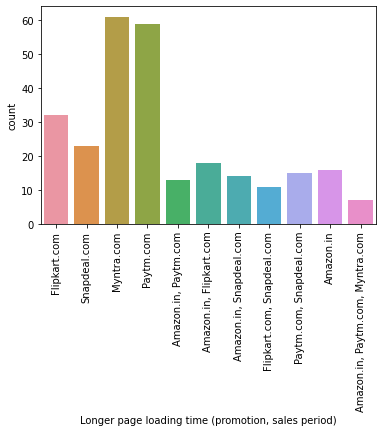

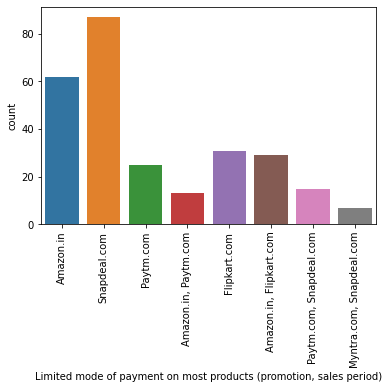

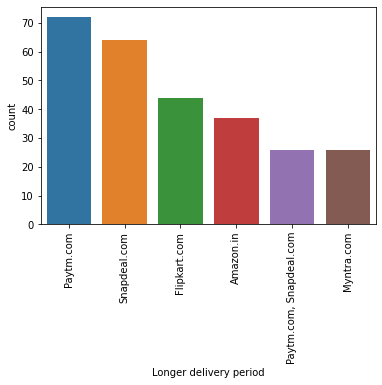

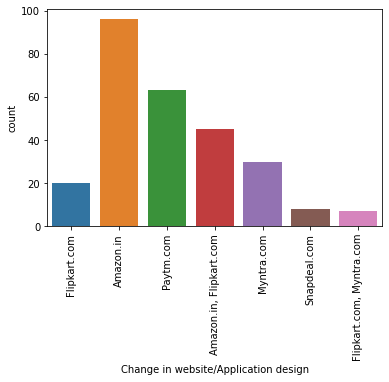

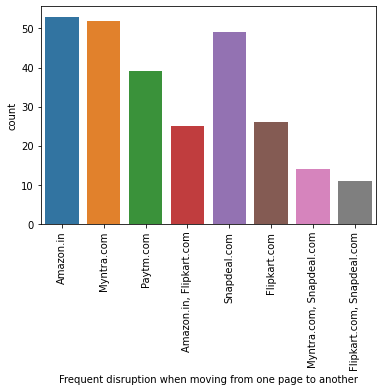

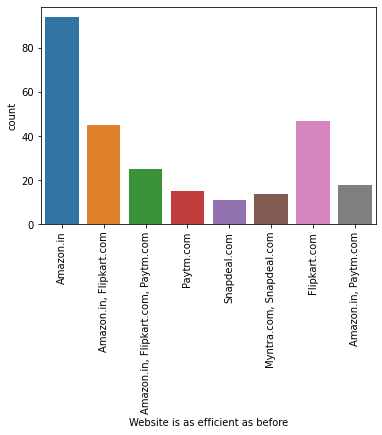

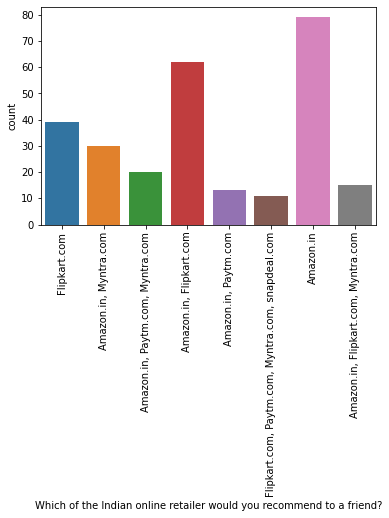

In [32]:
for i in File.columns:
    sns.countplot(File[i])
    plt.xticks(rotation=90)
    plt.show()

In [33]:
File['1Gender of respondent'].value_counts().sort_index()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [34]:
File['25 Convenient Payment methods'].value_counts()

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64

In [35]:
File['25 Convenient Payment methods'].iplot(kind='hist', xTitle='Convinient Scale',
                  yTitle='Total Count ', title='Convenient Payment methods')

AttributeError: 'Series' object has no attribute 'iplot'

In [36]:
File['6 How many times you have made an online purchase in the past 1 year?'].iplot(kind='hist', xTitle='Purchase',
                  yTitle='Total Purchase ', title='an online purchase in the past 1 year')

AttributeError: 'Series' object has no attribute 'iplot'

(array([0, 1, 2]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'indifferent (3)')])

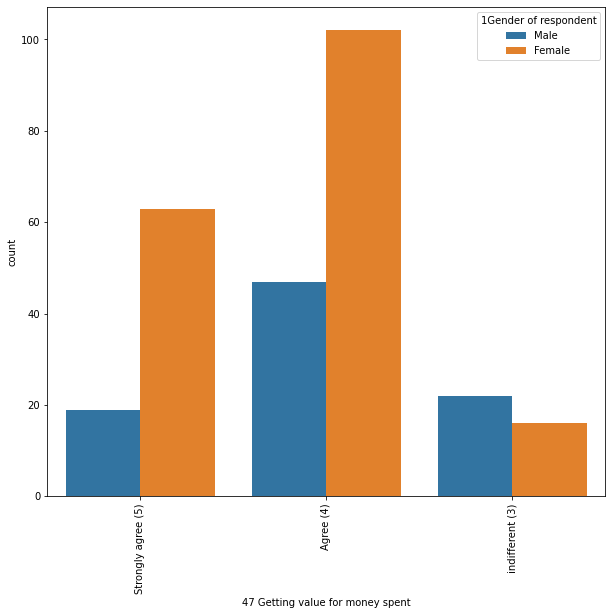

In [39]:
plt.figure(figsize=(10,9))
sns.countplot(x=File['47 Getting value for money spent'],hue=File['1Gender of respondent'],data=File)
plt.xticks(rotation=90)

In [41]:
fig = px.scatter_3d(File, x='1Gender of respondent', 
                    y='3 Which city do you shop online from?', 
                    z='8 Which device do you use to access the online shopping?',
                    color='1Gender of respondent')
fig.show()

In [42]:
for i in File.columns:
    fig = px.scatter_3d(File, x='1Gender of respondent', 
                    y='Which of the Indian online retailer would you recommend to a friend?', 
                    z='8 Which device do you use to access the online shopping?',
                    color='Which of the Indian online retailer would you recommend to a friend?')
fig.show()

In [43]:
for i in File.columns:
    fig = px.scatter_3d(File, x='1Gender of respondent', 
                    y='Longer delivery period', 
                    z='Longer page loading time (promotion, sales period)',
                    color='Longer delivery period')
fig.show()


In [44]:
for i in File.columns:
    fig = px.scatter_3d(File, x='1Gender of respondent', 
                    y='Security of customer financial information', 
                    z='Perceived Trustworthiness',
                    color='Perceived Trustworthiness')
fig.show()